# 必做题


## 题 1 —— 试另外的回归器


- 将课件中分析 `Boston` 房价数据集的 `ExtraTreesRegressor` 换成 `RandomForestRegressor` 进行分析
- `RandomForestRegressor` 也从模块 `sklearn.ensemble` 中导入

## 模块和数据准备

In [2]:
import IPython
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, 
    boston.target,
    test_size=0.25,
    random_state=33)
from sklearn.preprocessing import StandardScaler
#先转为二维数组
y_train = y_train.reshape(-1,1) # 1 列
y_test  = y_test.reshape(-1,1)  # 1 列
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)
# 转为一维数组
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)
print('X_train的大小:',X_train.shape,' y_train的大小:',y_train.shape)
print('\nX_test的大小:',X_test.shape,' y_test的大小:',y_test.shape)

X_train的大小: (379, 13)  y_train的大小: (379,)

X_test的大小: (127, 13)  y_test的大小: (127,)


## 定义K-折交叉验证函数

In [4]:
from sklearn.model_selection import cross_val_score, KFold
def train_and_evaluate(regr, X_train, y_train):
    regr.fit(X_train, y_train)  # 训练
    print ("在训练集上，决定系数：", regr.score(X_train, y_train))
    # 创建 K-折
    cv = KFold(5, shuffle=True, random_state=33)                     # model_selection 模块用
    #cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)  # cross_validation 模块用
    scores = cross_val_score(regr, X_train, y_train, cv=cv)
    print ("使用 K-折交叉验证的 平均决定系数:",np.mean(scores))

## 定义可视化函数

In [5]:
def visualization_for_predict_data(data_observed, data_predicted, label_observed, label_predicted,title):
    plt.scatter(data_observed, data_predicted)
    max_v = np.max([data_predicted] + [data_observed]) * 1.1
    min_v = np.min([data_predicted] + [data_observed]) * 1.1
    plt.plot([min_v,max_v], [min_v,max_v], "r-")
    plt.title(title)
    plt.xlabel(label_observed)
    plt.ylabel(label_predicted)

## 随机森林算法

In [6]:
from sklearn.ensemble import RandomForestRegressor
# 设定森林中有6棵树
forest = RandomForestRegressor(n_estimators = 10, random_state = 99 )
train_and_evaluate(forest,X_train,y_train)

在训练集上，决定系数： 0.9755954714187711
使用 K-折交叉验证的 平均决定系数: 0.835743349103155


### 训练集上的预测

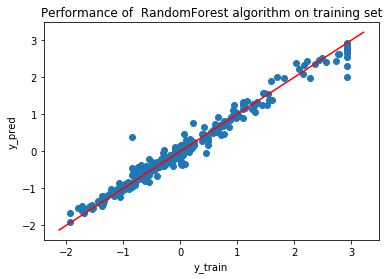

In [7]:
y_pred = forest.predict(X_train)
visualization_for_predict_data(y_train, y_pred, "y_train", "y_pred",
                               "Performance of  RandomForest algorithm on training set")

### 测试集上的预测

在测试集上，决定系数： 0.8201793399206312


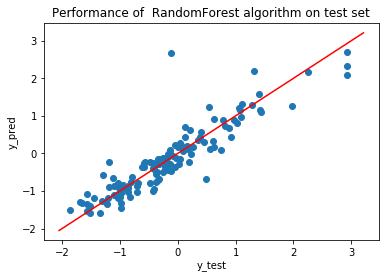

In [8]:
y_test_pred = forest.predict(X_test)
visualization_for_predict_data(y_test, y_test_pred, "y_test", "y_pred",
                               "Performance of  RandomForest algorithm on test set")
print ("在测试集上，决定系数：", forest.score(X_test, y_test))

## 调参——树的个数

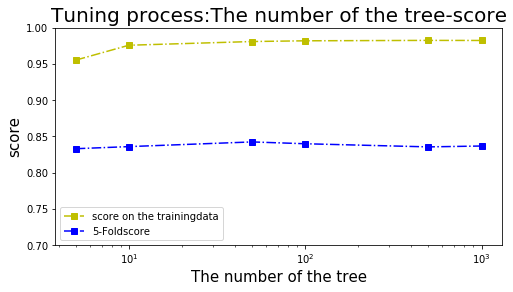

In [90]:
tree_list=[5,10,50,100,500,1000]
score_list=[]
KFoldscores_list=[]
for i in range(len(tree_list)):
    forest = RandomForestRegressor(n_estimators = tree_list[i], random_state = 99 )
    forest.fit(X_train, y_train)  # 训练
    score=forest.score(X_train, y_train)
    score_list.append(score)
    
    cv = KFold(5, shuffle=True, random_state=33)                
    KFoldscores = cross_val_score(forest, X_train, y_train, cv=cv)
    KFoldscores_list.append(np.mean(KFoldscores))
fig = plt.figure(figsize=(8, 4)) 
ax = fig.add_subplot(1, 1, 1);ax.set_xscale('log')
plt.plot(tree_list,score_list,'ys-.',label='score on the trainingdata')
plt.plot(tree_list,KFoldscores_list,'bs-.',label='5-Foldscore')
plt.xlabel("The number of the tree",fontsize=15)#x轴标签
plt.ylabel("score",fontsize=15)#y轴标签
plt.title("Tuning process:The number of the tree-score",fontsize=20)
plt.legend(loc=3,ncol=1)
plt.ylim(0.7, 1)
plt.show()

### 调参结果分析
* 增大随机森林树的个数对于分类器的效果有一定影响，但超过10棵树之后得分基本就稳定了。

## 调参——树最大深度

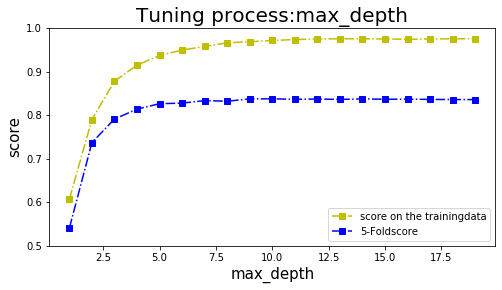

In [23]:
max_depth_list=range(1,20)
score_list=[]
KFoldscores_list=[]
for i in range(len(max_depth_list)):
    forest = RandomForestRegressor(n_estimators=10,max_depth = max_depth_list[i], random_state = 99 )
    forest.fit(X_train, y_train)  # 训练
    score=forest.score(X_train, y_train)
    score_list.append(score)
    
    cv = KFold(5, shuffle=True, random_state=33)                
    KFoldscores = cross_val_score(forest, X_train, y_train, cv=cv)
    KFoldscores_list.append(np.mean(KFoldscores))
fig = plt.figure(figsize=(8, 4)) 
ax = fig.add_subplot(1, 1, 1)
plt.plot(max_depth_list,score_list,'ys-.',label='score on the trainingdata')
plt.plot(max_depth_list,KFoldscores_list,'bs-.',label='5-Foldscore')
plt.xlabel("max_depth",fontsize=15)#x轴标签
plt.ylabel("score",fontsize=15)#y轴标签
plt.title("Tuning process:max_depth",fontsize=20)
plt.legend(loc=4,ncol=1)
plt.ylim(0.5, 1)
plt.show()

### 调参结果分析
* 增大随机森林树的最大深度明显有利于得分的提高
* 当最大深度为10左右时，再提高深度的影响并不大

## 调参——最大特征数

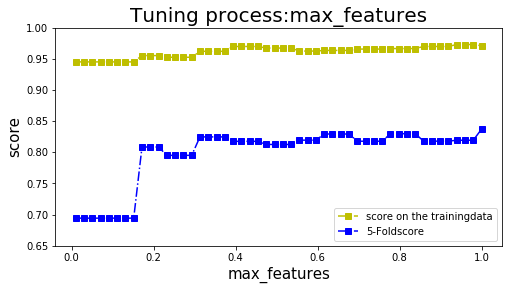

In [21]:
max_features_list=np.linspace(0.01,1.0)
score_list=[]
KFoldscores_list=[]
for i in range(len(max_features_list)):
    forest = RandomForestRegressor(n_estimators=10,max_depth = 10,max_features=max_features_list[i], random_state = 99 )
    forest.fit(X_train, y_train)  # 训练
    score=forest.score(X_train, y_train)
    score_list.append(score)
    
    cv = KFold(5, shuffle=True, random_state=33)                
    KFoldscores = cross_val_score(forest, X_train, y_train, cv=cv)
    KFoldscores_list.append(np.mean(KFoldscores))
fig = plt.figure(figsize=(8, 4)) 
ax = fig.add_subplot(1, 1, 1)
plt.plot(max_features_list,score_list,'ys-.',label='score on the trainingdata')
plt.plot(max_features_list,KFoldscores_list,'bs-.',label='5-Foldscore')
plt.xlabel("max_features",fontsize=15)#x轴标签
plt.ylabel("score",fontsize=15)#y轴标签
plt.title("Tuning process:max_features",fontsize=20)
plt.legend(loc=4,ncol=1)
plt.ylim(0.65, 1)
plt.show()

### 调参结果分析
* 注：max_features本身可以使用很多种类型的值 : "auto", "sqrt", "log2", int or float，float表示考虑特征数=max_features * n_features
* 图中可以看出，对于有十三个特征的波士顿房价，考虑的特征数在4个或以上时得分基本有保障。

# 选做题


## 题 2 ——  `EDA`

- 对 `Boston` 房价数据集的特征，画出特征-目标图，根据画出的图，说说从直观上看，对目标值的影响最显著的特征是什么？


- 注意
    - 大数据分析并不一定关注特征与目标之间的逻辑关系
    - 更追求发现数据之间的相关性


## 题 3 —— 数据调研


- 寻找改进后的 `Boston` 房价数据，给出数据源

## 题2 EDA

### 数据展示

In [24]:
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [44]:
target=pd.DataFrame(boston.target,columns=['MEDV'])
target.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


* CRIM：城镇人均犯罪率。
* ZN：占地面积超过25,000平方英尺的住宅用地比例。
* INDUS：城镇非零售商用土地的比例。
* CHAS：Charles River虚拟变量（如果是河道，则为1;否则为0）。
* NOX：一氧化氮浓度。
* RM：住宅平均房间数。
* AGE：1940 年之前建成的自用房屋比例。
* DIS：到波士顿五个中心区域的加权距离。
* RAD：辐射性公路的接近指数。
* TAX：每10,000美元的全额物业税率。
* PTRATIO：城镇师生比例。
* B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
* LSTAT：人口中地位低下者的比例。
* MEDV：自住房的平均房价，以千美元计。

### 数据检查

#### 检查有没有空值

In [128]:
data.isnull().any().sum()

0

没有

#### 根据数据的属性，检查CHAS是否只有零和一

In [28]:
data['CHAS'].unique()

array([0., 1.])

#### 观察数据的分布是否合理

In [25]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


* 除了CRIM和ZN两个特征，从数据的几个分位数和平均值，基本判断下来是合理
* 下面着重检查CRIM和ZN

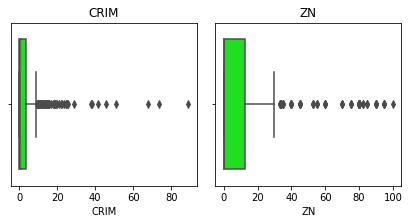

In [57]:
fig=plt.figure()
fig.set_size_inches(7,3)
plt.subplots_adjust(wspace=0.1, hspace=0.3)  
for i in range(2):
    fig.add_subplot(1,2,i+1)
    sns.boxplot(x=data[boston.feature_names[i]], color='lime')
    plt.title(boston.feature_names[i])

In [35]:
data[(data.CRIM>30)] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52


In [39]:
data[(data.ZN>30)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05


* 的确也有很多犯罪率和住宅用地比例较高的地区，所以可以认为数据是合理的

## 数据标准化

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(boston.data)
data=pd.DataFrame(data,columns=boston.feature_names)

## 数据相关性分析 Relationship Analysis

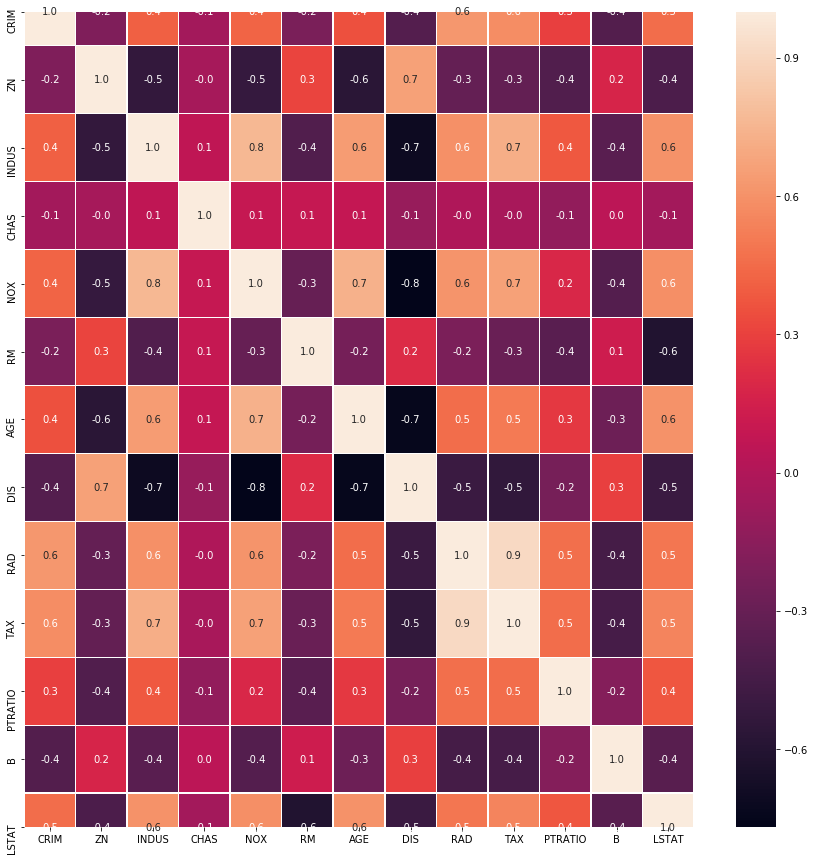

In [133]:
f,ax = plt.subplots(figsize=(15, 15))
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns, 
            annot=True, linewidths=.5, fmt= '.1f',ax=ax)

* INDUS：城镇非零售商用土地的比例。
* NOX：一氧化氮浓度。
* AGE：1940 年之前建成的自用房屋比例。
* DIS：到波士顿五个中心区域的加权距离。
* RAD：辐射性公路的接近指数。
* TAX：每10,000美元的全额物业税率。


* NOX和INDUS呈高度正相关（0.8）,因为商业化地区的污染相对较为严重，机动车尾气多。
* NOX和DIS呈高度负相关（-0.8），因为离市中心越远，一般来说环境越好，一氧化氮浓度越低；
* TAX和RAD呈高度正相关（0.9），因为一般来说开发商会比较关注交通便利性，以此作为宣传，交通越便利的房产，一般品质也会更高，物业费也会相应更高；
* DIS和AGE呈高度负相关（-0.7），因为一般新的中心区域是原理老城区的，老建筑越多的住宅区域，一般来说离市区越远。

### 将上述几对数据的关系可视化

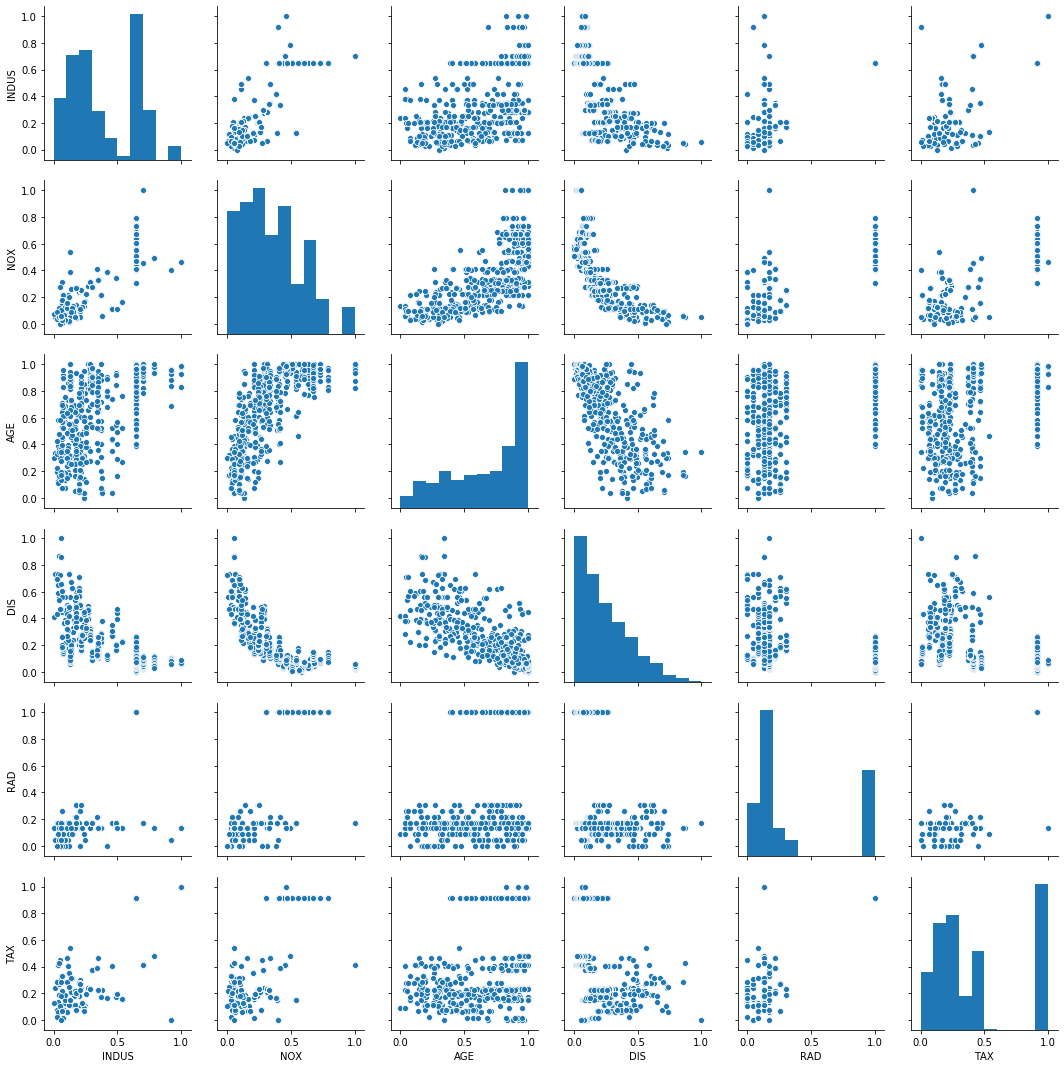

In [134]:
data1=data[['INDUS','NOX','AGE','DIS','RAD','TAX']]
sns.pairplot(data1)

### 找出对目标值的影响最显著的特征

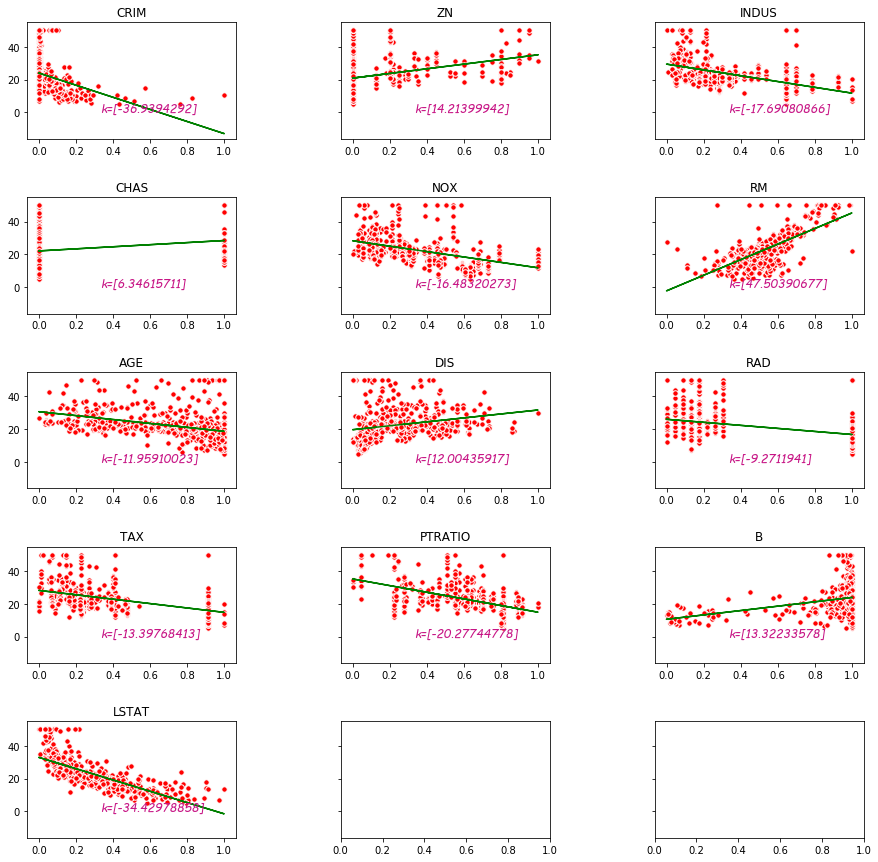

In [135]:
from sklearn.linear_model import LinearRegression
y = target.values
fig, axes= plt.subplots(5,3,sharey=True)
fig.set_size_inches(15,15)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(boston.feature_names)):
    X = data[[boston.feature_names[i]]].values
    lr = LinearRegression()
    lr.fit(X, y)
    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
    
    axes[i//3,i%3].set_title(boston.feature_names[i])
    plt.sca(axes[i//3,i%3])
    plt.scatter(X, y, c='r', s=30, edgecolor='white')
    plt.plot(X, lr.predict(X), c='g')
    plt.text( (X.max()+X.min())/3,0,'k='+format(lr.coef_[0]), family='fantasy', fontsize=12,style='italic',color='mediumvioletred')

### 结果分析
* 从斜率来看，对目标影响最大的前四个特征为： 1. RM  2. LSTAT 3. CRIM 4. PTRATIO
* 但是观察数据分布可知CRIM之所以斜率较大多因为少数几个异常值，整体来说点集中在一块，对于房价的影响贡献并不大

### 借用sklearn找出对目标最有影响的特征

In [139]:
x = data
y = target
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression, k=3)
bestFeature = SelectKBest.fit_transform(x,y)
SelectKBest.get_support()
x.columns[SelectKBest.get_support()]

C:\Users\solit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

####  结果与 用特诊-目标图的分析结果 一致
* RM是住宅平均房间数。我们生活中房间基本就是按照面积乘以单位面积价格，所以这个特征作为最有影响特征非常合理。
* PTRATIO是城镇师生比例。这个特征作为最有影响特征令人费解，可能这个特征代表了城镇发达程度，也与房价挂钩。
* LSTAT是人口中地位低下者的比例。显然这个特征与社区的品质十分相关，到底是平民窟级别还是高档小区，所以这个特征影响力很大也很合理。
